In [60]:
import pandas as pd

Read `train-1000` data

In [61]:
raw_trips = pd.read_csv('data/train-1000.csv')

raw_trips

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
...,...,...,...,...,...,...,...,...,...
995,1372668264620000113,C,NaN,NaN,20000113,1372668264,A,False,"[[-8.611398,41.143113],[-8.610714,41.143167],[..."
996,1372668303620000256,C,NaN,NaN,20000256,1372668303,A,False,"[[-8.628984,41.161023],[-8.628894,41.160996],[..."
997,1372668171620000678,B,NaN,15.0,20000678,1372668171,A,False,"[[-8.585775,41.148531],[-8.58582,41.14863],[-8..."
998,1372664244620000320,C,NaN,NaN,20000320,1372664244,A,False,"[[-8.606601,41.147955],[-8.606457,41.14791],[-..."


Parse `POLYLINE` string as Python list

In [62]:
from ast import literal_eval
trajectories = [literal_eval(raw_trips['POLYLINE'].iloc[i]) for i in range(len(raw_trips.index))]
trajectories[0]

[[-8.618643, 41.141412],
 [-8.618499, 41.141376],
 [-8.620326, 41.14251],
 [-8.622153, 41.143815],
 [-8.623953, 41.144373],
 [-8.62668, 41.144778],
 [-8.627373, 41.144697],
 [-8.630226, 41.14521],
 [-8.632746, 41.14692],
 [-8.631738, 41.148225],
 [-8.629938, 41.150385],
 [-8.62911, 41.151213],
 [-8.629128, 41.15124],
 [-8.628786, 41.152203],
 [-8.628687, 41.152374],
 [-8.628759, 41.152518],
 [-8.630838, 41.15268],
 [-8.632323, 41.153022],
 [-8.631144, 41.154489],
 [-8.630829, 41.154507],
 [-8.630829, 41.154516],
 [-8.630829, 41.154498],
 [-8.630838, 41.154489]]

Load GraphML and plot the street map of Porto.

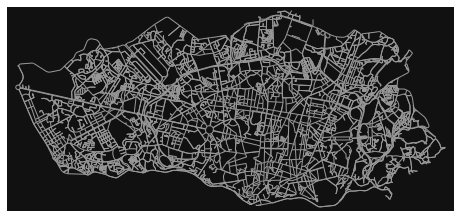

In [63]:
G = ox.load_graphml('data/porto.graphml')
fig, ax = ox.plot_graph(G, node_size=0)

['#ff0000', '#ffa500', '#b3ff00', '#08ff00', '#00ff9d', '#00b5ff', '#0010ff', '#9b00ff', '#ff00bd', '#ff0018']


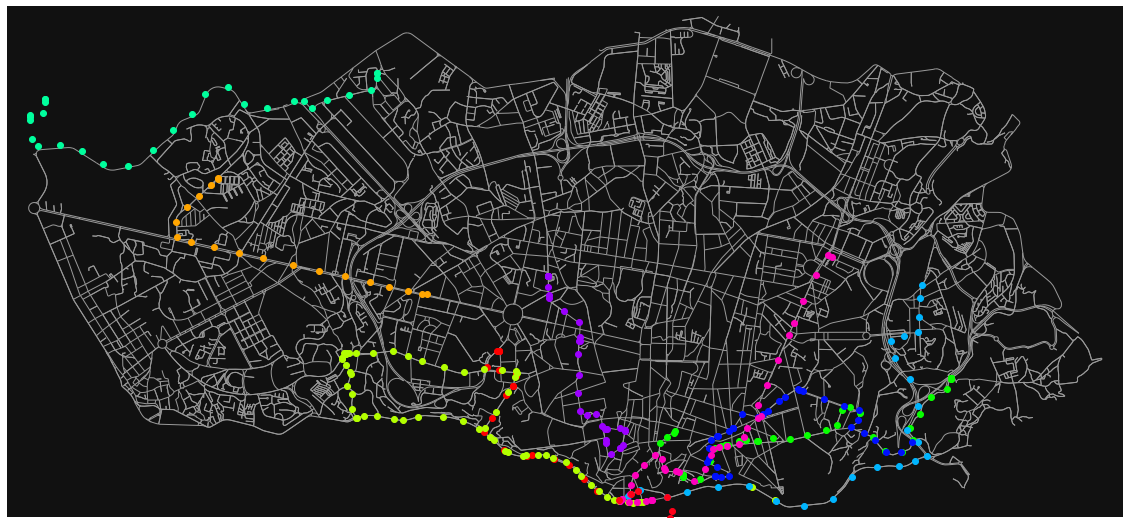

In [64]:
import matplotlib.pyplot as plt

fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False, figsize=(20, 20))
color_list = ox.plot.get_colors(10, cmap='hsv', return_hex=True)
print(color_list)
for idx, i in enumerate(trajectories):
    for j in i:
        ax.scatter(j[0], j[1], c=color_list[idx])
    if idx == 9: break
    
plt.show()